In [1]:
# importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_1 = pd.read_excel('Gapminder_key_1.xlsx')
data_2 = pd.read_excel('Gapminder_key_2.xlsx')

In [3]:
data_1

,country,year,population,continent
0,Afghanistan,1952,8425333,Asia
1,Afghanistan,1957,9240934,Asia
2,Afghanistan,1962,10267083,Asia
3,Afghanistan,1967,11537966,Asia
4,Afghanistan,1972,13079460,Asia
...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa
1700,Zimbabwe,1992,10704340,Africa
1701,Zimbabwe,1997,11404948,Africa
1702,Zimbabwe,2002,11926563,Africa


In [4]:
data_2

,country,year,life_exp,gdp_cap
0,Afghanistan,1952,28.801,779.445314
1,Afghanistan,1957,30.332,820.853030
2,Afghanistan,1962,31.997,853.100710
3,Afghanistan,1967,34.020,836.197138
4,Afghanistan,1972,36.088,739.981106
...,...,...,...,...
1699,Zimbabwe,1987,62.351,706.157306
1700,Zimbabwe,1992,60.377,693.420786
1701,Zimbabwe,1997,46.809,792.449960
1702,Zimbabwe,2002,39.989,672.038623


In [5]:
data_1.info()
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     1704 non-null   object
 1   year        1704 non-null   int64 
 2   population  1704 non-null   int64 
 3   continent   1704 non-null   object
dtypes: int64(2), object(2)
memory usage: 53.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   1704 non-null   object 
 1   year      1704 non-null   int64  
 2   life_exp  1704 non-null   float64
 3   gdp_cap   1704 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 53.4+ KB


In [6]:
data_1.head()

,country,year,population,continent
0,Afghanistan,1952,8425333,Asia
1,Afghanistan,1957,9240934,Asia
2,Afghanistan,1962,10267083,Asia
3,Afghanistan,1967,11537966,Asia
4,Afghanistan,1972,13079460,Asia


In [7]:
data_2.tail()

,country,year,life_exp,gdp_cap
1699,Zimbabwe,1987,62.351,706.157306
1700,Zimbabwe,1992,60.377,693.420786
1701,Zimbabwe,1997,46.809,792.449960
1702,Zimbabwe,2002,39.989,672.038623
1703,Zimbabwe,2007,43.487,469.709298


In [8]:
New_data = data_1.merge(data_2, on = ['country', 'year'], how='outer')
New_data

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623


In [9]:
np.shape(data_1)

(1704, 4)

In [10]:
np.shape(data_2)

(1704, 4)

In [11]:
np.shape(New_data)

(1704, 6)

In [12]:
New_data.describe()

,year,population,life_exp,gdp_cap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165876
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846988
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


## Q1: Country and continent are string data type. Please convert them into categorical data type using programming constructs.


In [13]:
New_data = New_data.astype({'country':'category', 'continent':'category'})
New_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   country     1704 non-null   category
 1   year        1704 non-null   int64   
 2   population  1704 non-null   int64   
 3   continent   1704 non-null   category
 4   life_exp    1704 non-null   float64 
 5   gdp_cap     1704 non-null   float64 
dtypes: category(2), float64(2), int64(2)
memory usage: 76.9 KB


## Q2: Count the number of countries in this dataset.


In [14]:
New_data["country"].nunique

<bound method IndexOpsMixin.nunique of 0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: category
Categories (142, object): ['Afghanistan', 'Albania', 'Algeria', 'Angola', ..., 'West Bank and Gaza', 'Yemen, Rep.', 'Zambia', 'Zimbabwe']>

## Q3: Which country had the lowest life expectancy in 2007?


In [15]:
New_data_2007 = New_data[New_data["year"]==2007]
New_data_2007[New_data_2007.life_exp == New_data_2007.life_exp.min()]

,country,year,population,continent,life_exp,gdp_cap
1463,Swaziland,2007,1133066,Africa,39.613,4513.480643


## Q4: Which country had the highest GDP per capita in 2007?


In [16]:
New_data_2007[New_data_2007.gdp_cap == New_data_2007.gdp_cap.max()]

,country,year,population,continent,life_exp,gdp_cap
1151,Norway,2007,4627926,Europe,80.196,49357.19017


### Q5: Which country had the highest GDP in 2007?


In [17]:
New_data['gdp']=New_data.gdp_cap*New_data.population 
New_data_2007= New_data[New_data['year']==2007] 
New_data_2007 [New_data_2007.gdp== New_data_2007.gdp.max()]

,country,year,population,continent,life_exp,gdp_cap,gdp
1619,United States,2007,301139947,Americas,78.242,42951.65309,1.293446e+13


### Q6: Is there any change in the trend from 1952 to 2007 in life expectancy


<AxesSubplot:xlabel='year', ylabel='life_exp'>

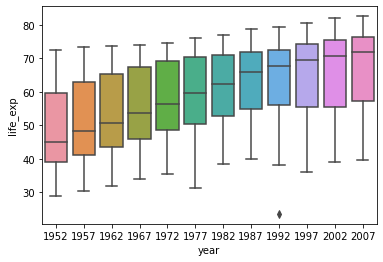

In [18]:
sns.boxplot(x='year',y='life_exp', data=New_data)

### Q7: Which continent has the lowest life expectancy in 2007?


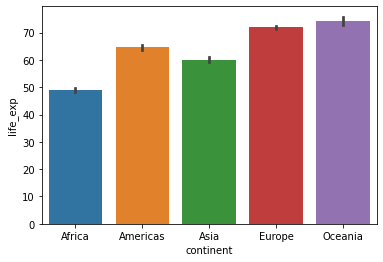

In [19]:
ax = sns.barplot(x='continent',y='life_exp', data=New_data)

### Q8: What was the average life expectancy, GDP and gdp per capita in 2007?


In [28]:
year_2007 = New_data[New_data['year']==2007]
year_2007.describe()

## HERE AVERAGE IN THE SENCE MEAN

,year,population,life_exp,gdp_cap,gdp
count,142.0,1.420000e+02,142.000000,142.000000,1.420000e+02
mean,2007.0,4.402122e+07,67.007423,11680.071820,4.092207e+11
std,0.0,1.476214e+08,12.073021,12859.937337,1.311852e+12
min,2007.0,1.995790e+05,39.613000,277.551859,3.190141e+08
25%,2007.0,4.508034e+06,57.160250,1624.842248,1.743849e+10
50%,2007.0,1.051753e+07,71.935500,6124.371108,5.786906e+10
75%,2007.0,3.121004e+07,76.413250,18008.835640,2.759600e+11
max,2007.0,1.318683e+09,82.603000,49357.190170,1.293446e+13


### Q9: Is there any relationship between life expectancy and gdp per capita? Please show each data point by continent.



Text(0, 0.5, 'Life Expectancy [in years]')

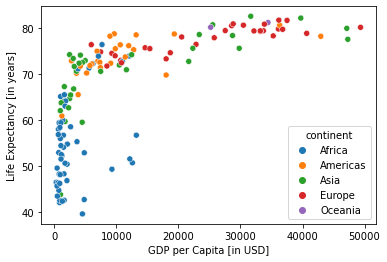

In [25]:
sns.scatterplot (x="gdp_cap",
                 y="life_exp",
                 hue="continent",
                 data=New_data_2007)

plt.xlabel('GDP per Capita [in USD]')

plt.ylabel('Life Expectancy [in years]')

### Q10: What can be done to see the relationship better between life expectancy and gdp percapita?


Text(0, 0.5, 'Life Expectancy [in years]')

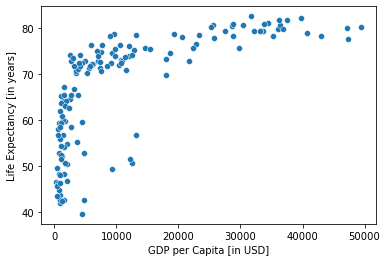

In [24]:
sns.scatterplot (x="gdp_cap",
                 y="life_exp",
                 data=New_data_2007)

plt.xlabel('GDP per Capita [in USD]')

plt.ylabel('Life Expectancy [in years]')

## Q11: What is the trend of life expectancy in India from 1952 - 2007?


<AxesSubplot:xlabel='year', ylabel='life_exp'>

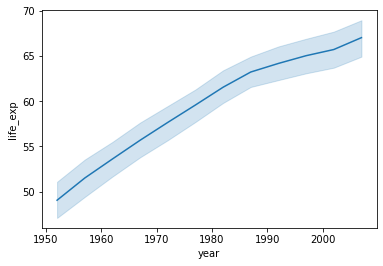

In [21]:
sns.lineplot(x='year',y='life_exp', data=New_data)

## Q12: What is the trend of GDP per capita in India from 1952 - 2007?


<AxesSubplot:xlabel='year', ylabel='gdp_cap'>

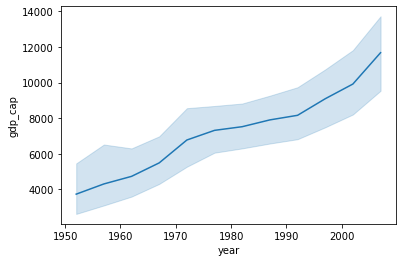

In [22]:
sns.lineplot(x='year',y='gdp_cap', data=New_data)

## Q13: What is the median age of each continent by year?


In [23]:
New_data_year_cont = New_data.groupby (['year', 'continent'])['life_exp'].median() 
New_data_year_cont

year  continent
1952  Africa       38.8330
      Americas     54.7450
      Asia         44.8690
      Europe       65.9000
      Oceania      69.2550
1957  Africa       40.5925
      Americas     56.0740
      Asia         48.2840
      Europe       67.6500
      Oceania      70.2950
1962  Africa       42.6305
      Americas     58.2990
      Asia         49.3250
      Europe       69.5250
      Oceania      71.0850
1967  Africa       44.6985
      Americas     60.5230
      Asia         53.6550
      Europe       70.6100
      Oceania      71.3100
1972  Africa       47.0315
      Americas     63.4410
      Asia         56.9500
      Europe       70.8850
      Oceania      71.9100
1977  Africa       49.2725
      Americas     66.3530
      Asia         60.7650
      Europe       72.3350
      Oceania      72.8550
1982  Africa       50.7560
      Americas     67.4050
      Asia         63.7390
      Europe       73.4900
      Oceania      74.2900
1987  Africa       51.6395
      Americ